# Homeless Population Data 

Explore total numbers of homeless in LA, as well as some of their demographic tags. All data are from LAHSA:
#data from https://www.lahsa.org/dashboards?id=12-count-by-city-council-district&ref=hc


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [147]:
##wrangle data into a usable dataframe. 

year_2015 = [8009, 930, 8084, 6094, 640, 1875, 4952, 1353, 3105, 5680, 25686]
year_2016 = [8708, 365, 8823, 6026, 571, 1856, 5229, 1689, 1787, 4920, 28464]
year_2017 = [10544, 129, 10230, 6170, 909, 10051, 5928, 3276, 2529, 10874, 33138]
year_2018 = [8357, 281, 7832, 4728, 588, 7540, 4368, 1202, 2048, 9072, 31285]
year_2019 = [10084, 396, 8785, 4888, 867, 9532, 6095, 1510, 2197, 12860, 36165]

In [148]:
d = {'2015': year_2015, '2016':year_2016, '2017':year_2017, '2018':year_2018, '2019':year_2019}
column_list = ["Chronically_Homeless", "Homeless_Family", "Mental_Illness", "Substance_Abuse", 
                                 "HIV/AIDS", "Chronic_Illness", "Physical_Disability", "Brain_Injury", 
               "Veterans", "Domestic_Violence", "total"]

In [149]:
df = pd.DataFrame(data=d)
df = df.T
df.columns=column_list

77301

In [443]:
df

,Chronically_Homeless,Homeless_Family,Mental_Illness,Substance_Abuse,HIV/AIDS,Chronic_Illness,Physical_Disability,Brain_Injury,Veterans,Domestic_Violence,total
2015,8009,930,8084,6094,640,1875,4952,1353,3105,5680,25686
2016,8708,365,8823,6026,571,1856,5229,1689,1787,4920,28464
2017,10544,129,10230,6170,909,10051,5928,3276,2529,10874,33138
2018,8357,281,7832,4728,588,7540,4368,1202,2048,9072,31285
2019,10084,396,8785,4888,867,9532,6095,1510,2197,12860,36165


## Plot Data w/ Seaborn:

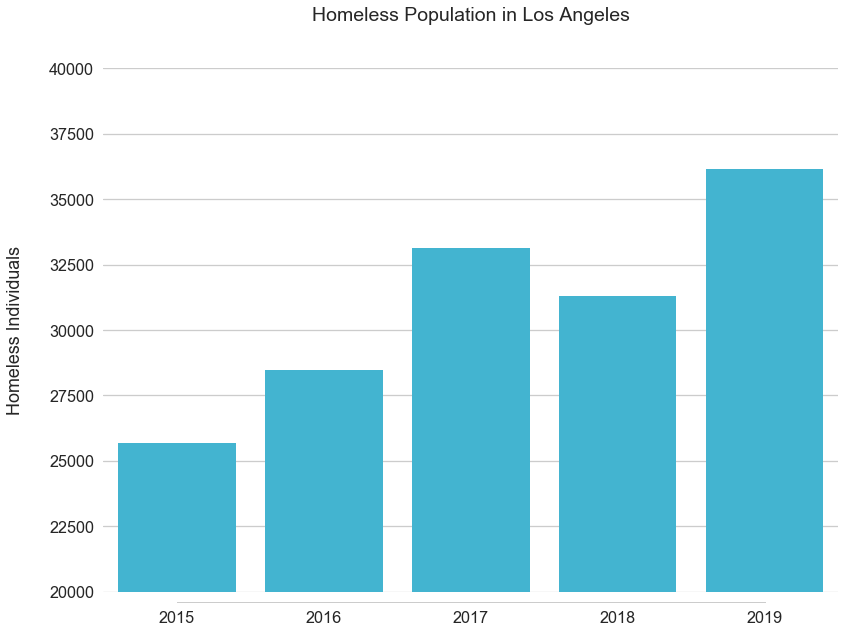

In [438]:
#plot overall numbers. Set figure size:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot on a white grid:
sns.set(style="whitegrid")

#set values for plot:
years = df.index.values
totals = df['total']

#SKL color scheme:
navy = ["#1E3066"]
light_blue = ["#2BC2E8"]

sns.set_context("talk", font_scale=1.25)


plt.ylim(20000,40000)
plt.tight_layout()
ax = sns.barplot(x=years, y=totals, data=df, palette=light_blue)
sns.despine(offset=10, trim=True, left=True)

plt.title("Homeless Population in Los Angeles", y=1.08)


#set y label:
plt.ylabel("Homeless Individuals")
##move ylabel out a bit:
ax.yaxis.labelpad=25



numpy.ndarray

## Now that we've got the basic plot, I'm going to use linear regression to predict our 2020 value, then add that value to the plot

Note that using a linear model to predict this data is liklely an over-simplification. Nonetheless, because the data are roughly linear over the last 5 years we are likely to end up with a value that is a reasonable estimate. 

In [312]:
from scipy import stats
from numpy import arange,array,ones
import numpy as np


In [ ]:
#perform linear regression. Note that linregress will need to be passed our years data as an array:

xi = np.array(years)
total = np.array(df['total'])
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,total)
line = slope*xi+intercept

In [412]:
line = slope*years_projected+intercept

TypeError: can't multiply sequence by non-int of type 'float'

In [417]:
slope

2377.9

In [377]:
#project a point for 2020, and convert to an int:

year_2020 = slope*2020+intercept
year_2020 = int(year_2020)
year_2020

38081

In [389]:
color_list = [light_blue*5 + gold]
color_list

[['#2BC2E8', '#2BC2E8', '#2BC2E8', '#2BC2E8', '#2BC2E8', '#F2D936']]

In [373]:
#now that we have a value for the year 2020, we can simply append the year and value to our previous datasets:

years_projected = np.append(years,'2020')
totals_projected = totals.append(pd.Series(year_2020, index=['2020']))
totals_projected = pd.DataFrame(totals_projected, columns=["total"])

In [447]:
totals_projected

,total
2015,25686
2016,28464
2017,33138
2018,31285
2019,36165
2020,38081


In [448]:
##build values for our regression line:
y_vals = []
for i in years_projected:
    int_val = int(i)
    val = slope*int_val+intercept
    y_vals.append(val)
y_vals

[26191.799999999814,
 28569.700000000186,
 30947.599999999627,
 33325.5,
 35703.40000000037,
 38081.299999999814]

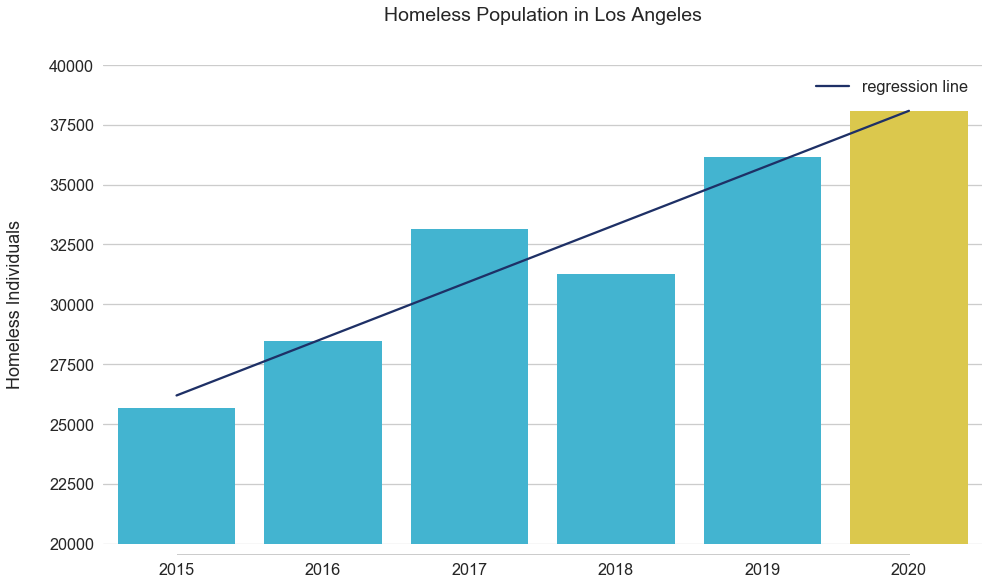

In [442]:
##now let's plot again. Add a fit line and color the projected year in gold:

#plot overall numbers. Set figure size:
sns.set(rc={'figure.figsize':(13.7,8.27)})

#plot on a white grid:
sns.set(style="whitegrid")

#set values for plot:
years = df.index.values
totals = df['total']

#SKL color scheme:
navy = ["#1E3066"]
light_blue = ["#2BC2E8"]
gold = ["#F2D936"]
color_list = ["#2BC2E8", "#2BC2E8", "#2BC2E8", "#2BC2E8", "#2BC2E8","#F2D936"]

sns.set_context("talk", font_scale=1.25)

plt.ylim(20000,40000)
plt.tight_layout()

#add a fit line:
plt.plot(years_projected, y_vals, color="#1E3066", label='regression line')
plt.legend(loc="upper right")

#plot our bar data:
ax = sns.barplot(x=years_projected, y=totals_projected['total'], data=totals_projected, palette=color_list)
sns.despine(offset=10, trim=True, left=True)

#plot title:
plt.title("Homeless Population in Los Angeles", y=1.08)
plt.subplots_adjust(top=0.88)


#set y label:
plt.ylabel("Homeless Individuals")
##move ylabel out a bit:
ax.yaxis.labelpad=25
plt.savefig("Homeless_Population_Time.png")

In [427]:
years_projected
xi

array(['2015', '2016', '2017', '2018', '2019'], dtype=object)

In [459]:
##how about just cd4?


cd4_data = {'total': [625, 628, 781, 777, 1187]}
cd4_df = pd.DataFrame(cd4_data, index=years)
cd4_df

,total
2015,625
2016,628
2017,781
2018,777
2019,1187


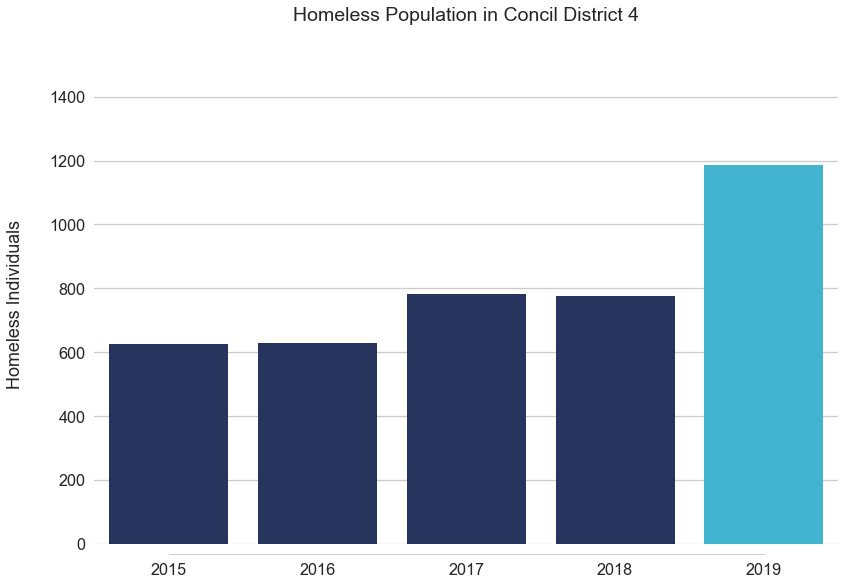

In [464]:
#plot overall numbers. Set figure size:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot on a white grid:
sns.set(style="whitegrid")

#set values for plot:
years = df.index.values
totals = df['total']

#SKL color scheme:
navy = ["#1E3066"]
light_blue = ["#2BC2E8"]

sns.set_context("talk", font_scale=1.25)
color_list = ["#1E3066", "#1E3066", "#1E3066", "#1E3066", "#2BC2E8"]

plt.ylim(0,1500)
plt.tight_layout()
ax = sns.barplot(x=years, y=cd4_df['total'], data=cd4_df, palette=color_list)
sns.despine(offset=10, trim=True, left=True)

plt.title("Homeless Population in Concil District 4", y=1.08)
plt.subplots_adjust(top=0.88)

#set y label:
plt.ylabel("Homeless Individuals")
##move ylabel out a bit:
ax.yaxis.labelpad=25

plt.ylabel("Homeless Individuals")
##move ylabel out a bit:
ax.yaxis.labelpad=25
plt.savefig("Homeless_Population_CD4.png")

## Now let's plot some of the specific demographics to see how they're changing over time. 

To keep things in the format of the above plot, just copy and paste the above code and adjust.



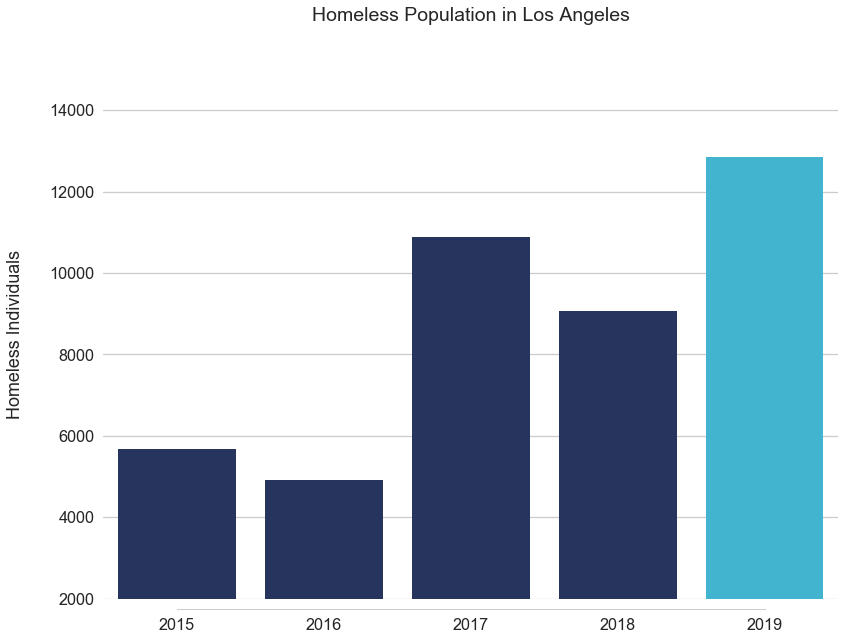

In [498]:
#plot 

#plot overall numbers. Set figure size:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot on a white grid:
sns.set(style="whitegrid")

#set values for plot:
years = df.index.values
totals = df['total']

#SKL color scheme:
navy = ["#1E3066"]
light_blue = ["#2BC2E8"]
color_list = ["#1E3066", "#1E3066", "#1E3066", "#1E3066", "#2BC2E8"]

sns.set_context("talk", font_scale=1.25)


plt.ylim(2000,15000)
plt.tight_layout()
ax = sns.barplot(x=years, y=df['Domestic_Violence'], data=df, palette=color_list)
sns.despine(offset=10, trim=True, left=True)

plt.title("Homeless Population in Los Angeles", y=1.08)


#set y label:
plt.ylabel("Homeless Individuals")
##move ylabel out a bit:
ax.yaxis.labelpad=25

In [469]:
df.head()

,Chronically_Homeless,Homeless_Family,Mental_Illness,Substance_Abuse,HIV/AIDS,Chronic_Illness,Physical_Disability,Brain_Injury,Veterans,Domestic_Violence,total
2015,8009,930,8084,6094,640,1875,4952,1353,3105,5680,25686
2016,8708,365,8823,6026,571,1856,5229,1689,1787,4920,28464
2017,10544,129,10230,6170,909,10051,5928,3276,2529,10874,33138
2018,8357,281,7832,4728,588,7540,4368,1202,2048,9072,31285
2019,10084,396,8785,4888,867,9532,6095,1510,2197,12860,36165


In [482]:
##One compelling way to look at this data would be to take the count differences for each class, from 2015 to 2019.
##build df:

five_year_change = pd.DataFrame(df.loc["2019"] - df.loc["2015"])
five_year_change = five_year_change.rename(columns={0:"total_change"})
five_year_change_sorted = five_year_change.sort_values(by=['total_change'])


,0
Chronically_Homeless,2075
Homeless_Family,-534
Mental_Illness,701
Substance_Abuse,-1206
HIV/AIDS,227
Chronic_Illness,7657
Physical_Disability,1143
Brain_Injury,157
Veterans,-908
Domestic_Violence,7180


In [499]:
five_year_change_sorted

,total_change
Substance_Abuse,-1206
Veterans,-908
Homeless_Family,-534
Brain_Injury,157
HIV/AIDS,227
Mental_Illness,701
Physical_Disability,1143
Chronically_Homeless,2075
Domestic_Violence,7180
Chronic_Illness,7657


In [511]:
##let's plot a subset of these values:

row_list = ['Substance_Abuse', 'Veterans', 'Mental_Illness', 'Domestic_Violence', 'Chronic_Illness']
sub_populations_df = five_year_change_sorted.loc[row_list]
labels = ['Substance Abuse', 'Veterans', 'Mental Illness', 'Domestic Violence', 'Chronic Illness']

sub_populations_df

,total_change
Substance_Abuse,-1206
Veterans,-908
Mental_Illness,701
Domestic_Violence,7180
Chronic_Illness,7657


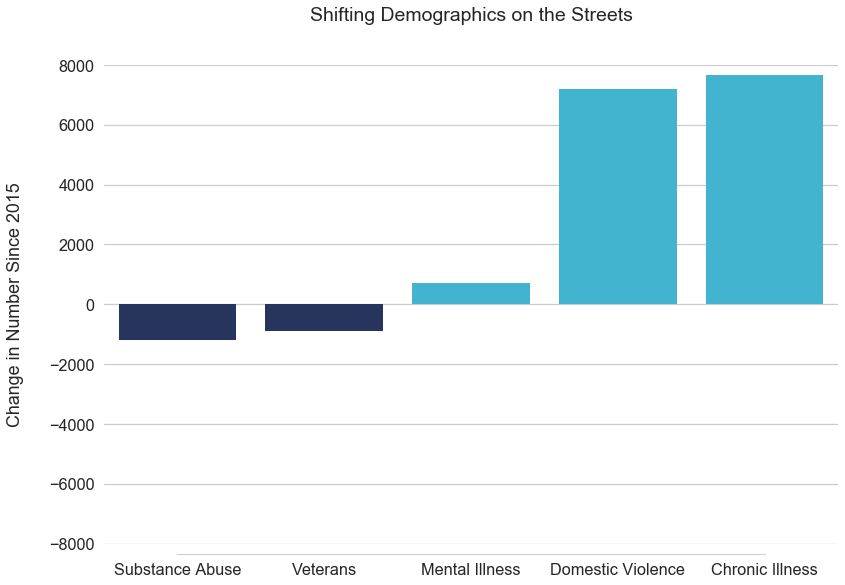

In [517]:
#plot overall numbers. Set figure size:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot on a white grid:
sns.set(style="whitegrid")

#set values for plot:
years = df.index.values
totals = df['total']

#SKL color scheme:
navy = ["#1E3066"]
light_blue = ["#2BC2E8"]
color_list = ["#1E3066", "#1E3066", "#2BC2E8", "#2BC2E8", "#2BC2E8"]

sns.set_context("talk", font_scale=1.25)


plt.ylim(-8000,8000)
plt.tight_layout()
ax = sns.barplot(x=labels, y=sub_populations_df['total_change'], data=sub_populations_df, palette=color_list)
sns.despine(offset=10, trim=True, left=True)
plt.subplots_adjust(top=0.88)

plt.title("Shifting Demographics on the Streets", y=1.08)


#set y label:
plt.ylabel("Change in Number Since 2015")
##move ylabel out a bit:
ax.yaxis.labelpad=25
#plt.savefig("Homeless_subPopulations.png")